# Problem 2 #

### Plot is at the bottom with all three derivative initial prices ###

In [400]:
import numpy as np 
from collections import Counter
import sys
from sympy import *
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [348]:
N = 10 
r = 0.02 
d = 0.9
S0 = 100
dt = 1/N
K = 100

#### Lets populate the stock price array ####

In [349]:
stockPrice = np.zeros([2**N,N+1],dtype = 'longdouble')
stockPrice[0,0] = S0

for column in range(N):
    
    for row in range((Counter(stockPrice[:,column] > 0)[True]*2)):
        
        try:
            
            u = 1.1 * (column+16)/(column+17)
            d = 0.9
        
            stockPrice[row*2,column+1] = stockPrice[row,column]*u
            stockPrice[(row*2)+1,column+1] = stockPrice[row,column]*d
        
        except:
            break

#### Lets populate the Risk Neutral Probabilities array ####

In [352]:
Q = np.zeros([2**N,N],dtype = 'longdouble')
Q.shape

rho = 1 + r*dt

In [353]:
for column in range(Q.shape[1]):
    
    colIndex = Q.shape[1] - column - 1
    for row in range(int(Counter(stockPrice[:,colIndex+1] >0)[True]/2)):
        
        x = Symbol("x")
        q = solve([stockPrice[2*row,colIndex+1]*x/rho + (1-x)*stockPrice[2*row+1,colIndex+1]/rho - stockPrice[row,colIndex]],x)[x]
        
        Q[2*row,colIndex] = q
        Q[(2*row)+1,colIndex] = 1-q

#### Lets now Calculate the Price of the European Put ####

In [354]:
putPrice = np.zeros((stockPrice.shape),dtype = 'longdouble')

for i in range(len(putPrice)):
    putPrice[i,-1] = max(K-stockPrice[i,-1],0)

In [355]:
for column in range(putPrice.shape[1]-1):
    
    colIndex = putPrice.shape[1] - 2 - column

    for row in range(int(len(putPrice)/(2**(column+1)))):
        
        putPrice[row,colIndex] = Q[2*row,colIndex]*putPrice[2*row,colIndex+1]/rho + Q[2*row+1,colIndex]*putPrice[2*row+1,colIndex+1]/rho

In [371]:
europeanInit = putPrice[0,0]

In [ ]:
putPrice

# Problem 3 #

In [ ]:
N = 10 
r = 0.02 
d = 0.9
S0 = 100
dt = 1/N
K = 100

#### Lets populate the stock price array ####

In [241]:
stockPrice = np.zeros([2**N,N+1],dtype = 'longdouble')
stockPrice[0,0] = S0

for column in range(N):
    
    for row in range((Counter(stockPrice[:,column] > 0)[True]*2)):
        
        try:
            
            u = 1.1 * (column+16)/(column+17)
            d = 0.9
        
            stockPrice[row*2,column+1] = stockPrice[row,column]*u
            stockPrice[(row*2)+1,column+1] = stockPrice[row,column]*d
        
        except:
            break

#### Lets populate the Risk Neutral Probabilities array ####

In [125]:
Q = np.zeros([2**N,N],dtype = 'longdouble')
Q.shape

rho = 1 + r*dt

In [126]:
for column in range(Q.shape[1]):
    
    colIndex = Q.shape[1] - column - 1
    for row in range(int(Counter(stockPrice[:,colIndex+1] >0)[True]/2)):
        
        x = Symbol("x")
        q = solve([stockPrice[2*row,colIndex+1]*x/rho + (1-x)*stockPrice[2*row+1,colIndex+1]/rho - stockPrice[row,colIndex]],x)[x]
        
        Q[2*row,colIndex] = q
        Q[(2*row)+1,colIndex] = 1-q

#### Lets now Calculate the Price of the American Derivative (I reused some code so the name of the var is putPrice though it isn't a put) ####

In [373]:
putPrice = np.zeros((stockPrice.shape),dtype = 'longdouble')

for i in range(len(putPrice)):
    if stockPrice[i,-1] >= 144:
        putPrice[i,-1] = np.sqrt(stockPrice[i,-1])
    else:
        putPrice[i,-1] = max(stockPrice[i,-1]-88,0)


In [374]:
for column in range(putPrice.shape[1]-1):
    
    colIndex = putPrice.shape[1] - 2 - column

    for row in range(int(len(putPrice)/(2**(column+1)))):
        
        putPrice[row,colIndex] = Q[2*row,colIndex]*putPrice[2*row,colIndex+1]/rho + Q[2*row+1,colIndex]*putPrice[2*row+1,colIndex+1]/rho

In [375]:
def exercise(x):
    "American Style option payoff function"
    if x>= 144:
        return np.sqrt(x)
    else:
        return max(x-88,0)

In [376]:
exercise = np.vectorize(exercise)
putPrice2 = exercise(stockPrice)

In [377]:
putPrice = np.maximum(putPrice,putPrice2)
americanDerivative = putPrice
americanDerivative

In [378]:
exercisedArray = np.zeros(putPrice.shape)

for i in range(putPrice.shape[1]):
    for j in range(2**i):
        if putPrice[j,i] == putPrice2[j,i]:
            exercisedArray[j,i] = 1 

In [461]:
americanInit = putPrice[0,0]
americanInit

9.557590066724362875

In [460]:
exercisedArray

array([[0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

# Problem 4 #

In [ ]:
N = 10 
r = 0.02 
d = 0.9
S0 = 100
dt = 1/N
K = 100

#### Lets populate the stock price array ####

In [241]:
stockPrice = np.zeros([2**N,N+1],dtype = 'longdouble')
stockPrice[0,0] = S0

for column in range(N):
    
    for row in range((Counter(stockPrice[:,column] > 0)[True]*2)):
        
        try:
            
            u = 1.1 * (column+16)/(column+17)
            d = 0.9
        
            stockPrice[row*2,column+1] = stockPrice[row,column]*u
            stockPrice[(row*2)+1,column+1] = stockPrice[row,column]*d
        
        except:
            break

#### Lets populate the Risk Neutral Probabilities array ####

In [125]:
Q = np.zeros([2**N,N],dtype = 'longdouble')
Q.shape

rho = 1 + r*dt

In [126]:
for column in range(Q.shape[1]):
    
    colIndex = Q.shape[1] - column - 1
    for row in range(int(Counter(stockPrice[:,colIndex+1] >0)[True]/2)):
        
        x = Symbol("x")
        q = solve([stockPrice[2*row,colIndex+1]*x/rho + (1-x)*stockPrice[2*row+1,colIndex+1]/rho - stockPrice[row,colIndex]],x)[x]
        
        Q[2*row,colIndex] = q
        Q[(2*row)+1,colIndex] = 1-q
        
        

#### Lets now Calculate the Price of the Barrier Option ####

In [387]:
putPrice = np.zeros((stockPrice.shape),dtype = 'longdouble')

for i in range(len(putPrice)):
    if np.abs(stockPrice[i,-1]-100) < 60:
        putPrice[i,-1] = max(stockPrice[i,-1]-100,0)
    else:
        putPrice[i,-1] = 0


In [388]:
for column in range(putPrice.shape[1]-1):
    
    colIndex = putPrice.shape[1] - 2 - column

    for row in range(int(len(putPrice)/(2**(column+1)))):
        
        putPrice[row,colIndex] = Q[2*row,colIndex]*putPrice[2*row,colIndex+1]/rho + Q[2*row+1,colIndex]*putPrice[2*row+1,colIndex+1]/rho

In [ ]:
putPrice

In [391]:
barrierInit = putPrice[0,0]
barrierInit

9.557590066724362875

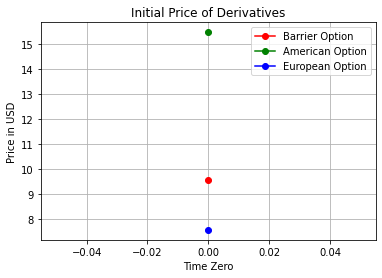

In [458]:
plot1 = plt.plot(0,barrierInit,marker ='o',color = 'red',label = 'Barrier Option')
plot2 = plt.plot(0,americanInit,marker = 'o',color = 'green',label = 'American Option')
plot3 = plt.plot(0,europeanInit,marker = 'o',color = 'blue',label = 'European Option')
plt.xlabel('Time Zero')
plt.ylabel('Price in USD')
plt.title('Initial Price of Derivatives')
plt.grid(True)
plt.legend()

# Problem 5 #

In [464]:
k = [10,20,30] 
r = 0.02
S0 = 100

In [ ]:
u = 1 + np.log(1.1)/np.sqrt(k)
d = 1 - np.log(1.1)/np.sqrt(k)

In [545]:
stockPrice = [0,0,0]
putPrice = [0,0,0]

In [617]:
counter = 0
for num in k:
    putPrice[counter] = np.zeros([num*20 + 1, num*20 + 1])
    stockPrice[counter] = np.zeros([num*20 + 1,num*20 + 1])
    stockPrice[counter][0,0] = S0
    counter += 1

In [618]:
for i in range(3):
    array = stockPrice[i]
    
    for column in range(array.shape[1]-1):
        
        for row in range(Counter(array[:,column]>0)[True]):
            
            array[row,column+1] = array[row,column] * (1 + np.log(1.1)/np.sqrt(k[i]))
            array[row+1,column+1] = array[row,column] * (1 - np.log(1.1)/np.sqrt(k[i]))

In [619]:
np.set_printoptions(threshold=40000)

In [620]:
stockPrice

[array([[1.00000000e+02, 1.03013973e+02, 1.06118785e+02, ..., 3.57630677e+04, 3.68409567e+04, 3.79513330e+04],
        [0.00000000e+00, 9.69860275e+01, 9.99091597e+01, ..., 3.36703632e+04, 3.46851787e+04, 3.57305804e+04],
        [0.00000000e+00, 0.00000000e+00, 9.40628953e+01, ..., 3.17001149e+04, 3.26555477e+04, 3.36397769e+04],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ..., 2.33569364e-01, 2.40609080e-01, 2.47860972e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ..., 0.00000000e+00, 2.26529647e-01, 2.33357189e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ..., 0.00000000e+00, 0.00000000e+00, 2.19702106e-01]]),
 array([[1.00000000e+02, 1.02131200e+02, 1.04307821e+02, ..., 4.41629131e+05, 4.51041133e+05, 4.60653723e+05],
        [0.00000000e+00, 9.78687996e+01, 9.99545798e+01, ..., 4.23197933e+05, 4.32217129e+05, 4.41428542e+05],
        [0.00000000e+00, 0.00000000e+00, 9.57830193e+01, ..., 4.05535953e+05, 4.14178737e+05, 4.2

In [621]:
q = [0,0,0]

for i in range(3):
    
    q[i] = (1 - (1 - np.log(1.1)/np.sqrt(k[i]))/(1+r/(20*k[i]))) / ( (1 + np.log(1.1)/np.sqrt(k[i]))/(1+r/(20*k[i])) - (1 - np.log(1.1)/np.sqrt(k[i]))/(1+r/(20*k[i])))

In [622]:
q

[0.5016589401397947, 0.5011730478224331, 0.5009577895362799]

In [623]:
for i in range(3):
    for row in range(putPrice[i].shape[0]):
        putPrice[i][row,-1] = max(K - stockPrice[i][row,-1],0)

In [625]:
for i in range(3):
    array = putPrice[i]
    
    for column in range(array.shape[1]-1):
        
        colIndex = array.shape[1] - 1 - column
        
        for row in range(array.shape[0]-column-1):
            
            putPrice[i][row,colIndex-1] = q[i]*array[row,colIndex]/(1+r/(20*k[i])) + (1-q[i])*array[row+1,colIndex]/(1+r/(20*k[i]))

In [626]:
putPrice

[array([[15.76044474, 14.56749691, 13.4201712 , ...,  0.        ,  0.        ,  0.        ],
        [ 0.        , 16.96449763, 15.72538453, ...,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , 18.21526475, ...,  0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 99.74643364, 99.74939192, 99.75213903],
        [ 0.        ,  0.        ,  0.        , ...,  0.        , 99.76347135, 99.76664281],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,  0.        , 99.78029789]]),
 array([[15.73786998, 14.89334428, 14.07171865, ...,  0.        ,  0.        ,  0.        ],
        [ 0.        , 16.58794517, 15.72032704, ...,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        , 17.4613066 , ...,  0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 99.97110274, 99.97569949, 99.9802879 ],
        [ 0.        ,  0.        ,  0.    